Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


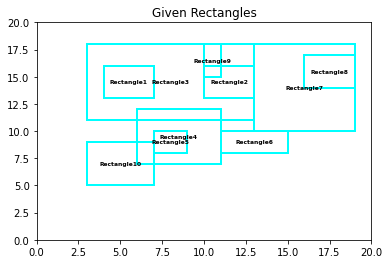

In [32]:
# NAME    : ABHAV S VELIDI
# USN     : 222VL001
# COURSE  : MTech VLSI Design
# Credits : www.geeksforgeeks.com
# Credits : www.w3hschools.com
# Credits : 
# Reading text file and plotting the rectangles
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from zmq.constants import NULL
from google.colab import drive
drive.mount('/content/drive/')
# Set the path according to the location of test_data.txt file in google drive
path = '/content/drive/MyDrive/VDC/Assignment_1/test_data.txt'
#List of declaration to be used in plot function
#x =[]
#y =[]
#file1 points to path which has a text file which is opened in read mode
file1 = open(path,"r")
#copies the contents of file1 to data using read operation 
data = file1.read()
#As the file contains various characters they are removed as follows to create
#a list
data = data.translate({ord('{'): None})
data = data.translate({ord('}'): None})
data = data.translate({ord(' '): None})
data = data.translate({ord('\n'): None})
#We can split the text file at "," to create a list
data = data.split(",")
#The list data contains string data 
#The below for loop typecast the string to integer
for i in range(len(data)):
  data[i] = int(data[i])
#Creating a backup of the data_manipulation done till now
data_1 = data;
#Creating Individual sublist of 5 values each defining paticular values
data = [data[x:x+5] for x in range(0, len(data), 5)]

# Plotting the rectangles on to the cartesian system
# Creating an empty figure to plot all the rectangles on to the converse
fig = plt.figure()
ax = fig.add_subplot()

for i in range(len(data)):
    rect = matplotlib.patches.Rectangle((data[i][1], data[i][2]), data[i][3]-data[i][1], data[i][4]-data[i][2], edgecolor='cyan',
    facecolor='none', linewidth=2)
    ax.add_patch(rect)
    ax.annotate("Rectangle"+ str((data[i][0])) ,((data[i][1]+data[i][3])*0.5, (data[i][2]+data[i][4])*0.5), color='black', weight='bold', fontsize=6, ha='center', va='center')
    plt.xlim([0, 20])
    plt.ylim([0, 20])

plt.title('Given Rectangles')
plt.show()

In [33]:
# Question 1: 
# Accept input {x, y} from the keyboard.
# Print if this point lies within any of the rectangles in the given test data set.
# If yes then list the rectangles enclosing the given point in the format
# {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id}. 
# Eg: {1, 5, 8} implies that given point(x, y)
# is enclosed in the rectangles 1, 5 and 8.

# This list holds the rectangles that include the co-ordinates given by user 
rect_encl = []
# Take in the x co-ordiante from the user
x_1 = float(input('Enter the x co-ordinate: '))
# Take in the y co-ordinate from the user
y_1 = float(input('Enter the y co-ordinate: '))
# The for loop is run to check weather the given cordinate lie in any of the
# given rectangles 
for i in range(len(data)):
  # Check the x co-ordinate of the rectangle 
  if (data[i][1] < x_1 < data[i][3]):
    # Check the y co-ordinate of the rectangle
    if (data[i][2] < y_1 < data[i][4]):
      # If given given co-ordinate lies inside the rectangle append it to the
      # list
      rect_encl.append(data[i][0])
  else:
    #If it does'nt lie in the rectangle continue with the for loop
    continue
# Print the list of enclosed rectangles
print(rect_encl)

Enter the x co-ordinate: 3
Enter the y co-ordinate: 8
[]


In [38]:
1# Question 2:
# List of rectangles that don't overlap any other rectangles.
# The output should be in the format 
# {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id} 

# This list holds the rectangles that are not included by the co-ordinates
# given by user 
rect_encl = []
temp = []
l1=[]
l4=[]
# The for loop is run to check weather the given cordinate lies in any of the
# given rectangles 
for i in range(0,len(data)):
  temp = []
  for j in range(len(data)):
    # Check the x and y co-ordinates of the rectangles are compared with every
    # rectangle in the list 
    if(i != j):
      if ((data[i][1] < data[j][1] < data[i][3]) and (data[i][2] < data[j][2] < data[i][4])):
        # If the co-ordinates lie within the range then the rectangle overlaps 
        # the other
        continue
      elif ((data[i][1] < data[j][3] < data[i][3]) and (data[i][2] < data[j][4] < data[i][4])):
        # If the co-ordinates lie within the range then the rectangle overlaps 
        # the other      
        continue
      elif  ((data[i][1] < data[j][1] < data[i][3]) and (data[i][2] < data[j][4] < data[i][4])):
        # If the co-ordinates lie within the range then the rectangle overlaps 
        # the other      
        continue
      elif  ((data[i][1] < data[j][3] < data[i][3]) and (data[i][2] < data[j][2] < data[i][4])):
        # If the co-ordinates lie within the range then the rectangle overlaps 
        # the other      
        continue
      else:
        # If the co-ordinates lie within the range then the rectangle overlaps 
        # the other      
        temp.append(data[j][0])

  # Append the given list to the 
  rect_encl.append(temp);
  # Once the 'j' iteration is done append the value to the main list i.e rect_ovrlp

# Print the list of enclosed rectangles
print(rect_encl)

[[2, 3, 4, 5, 6, 7, 8, 9, 10], [1, 3, 4, 5, 6, 7, 8, 10], [5, 6, 7, 8, 10], [1, 2, 3, 6, 7, 8, 9], [1, 2, 3, 4, 6, 7, 8, 9, 10], [1, 2, 3, 4, 5, 7, 8, 9, 10], [1, 2, 3, 4, 5, 6, 9, 10], [1, 2, 3, 4, 5, 6, 7, 9, 10], [1, 2, 3, 4, 5, 6, 7, 8, 10], [1, 2, 3, 5, 6, 7, 8, 9]]


In [39]:
# Question 3:
# List of rectangles that overlap with other rectangles in the format 
# {{rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, 
# {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it},
#  ..... {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}}
# Eg: {{5, 7, 9, 12}, {6, 10, 12}} implies that rectangle 5 overlaps with 
# rectangles 7, 9 and 12; rectangle 6 overlaps with rectangles 10 and 12.
# Declare an empty set to hold the data of each rectangle it's over laping with
rect_ovrlap = []
# This list is used to temporarly store the data after each iteration
# Also the list is cleared after each iteration
temp = [] 
# The for loop implemented is similar to searching algorithms that compare 
# the given value with its adjacent values, well in this case it compares it
# with co-ordinates of other rectangles
for i in range(0,len(data)):
  # clear the temp variable after every 'i' iteration 
  temp = []
  for j in range(len(data)):
    # Check the x and y co-ordinates of the rectangles are compared with every
    # rectangle in the list 
    if(i != j):
      if ((data[i][1] < data[j][1] < data[i][3]) and (data[i][2] < data[j][2] < data[i][4])):
        # If the co-ordinates lie within the range then the rectangle overlaps 
        # the other
        temp.append((data[j][0]))
      elif ((data[i][1] < data[j][3] < data[i][3]) and (data[i][2] < data[j][4] < data[i][4])):
        # If the co-ordinates lie within the range then the rectangle overlaps 
        # the other      
        temp.append((data[j][0]))
      elif  ((data[i][1] < data[j][1] < data[i][3]) and (data[i][2] < data[j][4] < data[i][4])):
        # If the co-ordinates lie within the range then the rectangle overlaps 
        # the other      
        temp.append((data[j][0]))
      elif  ((data[i][1] < data[j][3] < data[i][3]) and (data[i][2] < data[j][2] < data[i][4])):
        # If the co-ordinates lie within the range then the rectangle overlaps 
        # the other      
        temp.append((data[j][0]))
      else:
        continue
  rect_ovrlap.append(temp);
  # Once the 'j' iteration is done append the value to the main list i.e rect_ovrlp
print(rect_ovrlap)


[[], [9], [1, 2, 4, 9], [5, 10], [], [], [8], [], [], [4]]


In [36]:
# Question 4:
# List of rectangles that contain other rectangles in the format 
# {rectangle_id, list_of_rectangle_ids_which_are_contained_in}
# Eg: {{5, 2, 6}, {4, 3, 9}} implies that rectangle 5 contains 
# rectangles 2 and 6; rectangle 4 contains rectangles 3 and 9.
# Declare an empty list to hold the data of each rectangle it's over laping with
rect_contain = []
# This list is used to temporarly store the data after each iteration
# Also the list is cleared after each iteration
temp_1 = [] 
# The for loop implemented is similar to searching algorithms that compare 
# the given value with its adjacent values, well in this case it compares it
# with co-ordinates of other rectangles
for i in range(len(data)):
  # clear the temp variable after every 'i' iteration 
  temp_1 = []
  for j in range(len(data)):
    if(i != j):
      # Check the x and y co-ordinates of the rectangles are compared with every
      # rectangle in the list 
      if ((data[i][1] <= data[j][1] <= data[i][3]) and (data[i][1] <= data[j][3] <= data[i][3])):
         if ((data[i][2] <= data[j][2] <= data[i][4]) and (data[i][2] <= data[j][4] <= data[i][4])):  
           # If the co-ordinates lie within the range then the rectangle contain 
            # each other
          temp_1.append(data[j][0])
         else:
           continue
      else:
        continue
  # Once the 'j' iteration is done append the value to the main list i.e rect_ovrlp
  rect_contain.append(temp_1)
print(rect_contain)

[[], [], [1, 2, 9], [5], [], [], [8], [], [], []]


In [37]:
rect_abutting = []
temp2 = [] 
for i in range(0,10):
  for j in range(0,10):
    if(i != j):
      if (data[i][2] == data[j][4]):
        if ((data[i][1] <= data[j][1] <= data[i][4]) or (data[i][1] <= data[j][4] <= data[i][4]) ):
          rect_abutting.append([data[i][0],'s',data[j]][0])
        else:
          continue
      if (data[i][3] == data[j][1]):
        if ((data[i][1] <= data[j][1] <= data[i][4]) or (data[i][1] <= data[j][4] <= data[i][4]) ):
          rect_abutting.append([data[i][0],'s',data[j]][0])
        else:
          continue
rect_abutting

[2, 2, [3, 'e', 2], [3, 'n', 7], [7, 'e', 8], [9, 'n', 3]]